# Credit Data Exploring and Cleaning by Python

In this file, I will use python to complete data exploing and cleaning assignment. The credit dataset is obtained from Kaggle.

In [1]:
import warnings
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from keras.regularizers import l2
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn .metrics import accuracy_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

Import data into python and see the basic information of the dataset. We can see that the training set of the data has 100,000 observations and 28 features.

In [2]:
df = pd.read_csv('train.csv')
df.shape

(100000, 28)

Check the initial column names.

In [5]:
col_names = df.columns
col_names

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Drop some columns that will not be analyzed and see some basic inormation of the data frame.

In [6]:
df.drop(['ID' ,'Customer_ID' ,'Month' ,'Name', 'Type_of_Loan', 'Credit_History_Age', 'SSN'], axis=1, inplace=True)
df.info()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

Then check how many empty value each column has.

In [8]:
df.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Check how many duplicated observations

In [9]:
df.duplicated().sum()

0

Dropping all observations with more than 3 missing values

In [10]:
size_before_cleaning = df.shape
df = df[df.isnull().sum(axis=1) < 3]
print("{} Records dropped".format(size_before_cleaning[0] - df.shape[0]))

101 Records dropped


Clean all the features separately.

In [11]:
def filter_general(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)

In [12]:
def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif '_' in str(value):
        return str(value).replace("_", "")
    elif str(value) == '_':
        return str(value)
    else:
        return str(value)

In [13]:
def Amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)

In [14]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].apply(Amount_invested_monthly)
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].astype("float")

In [15]:
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].apply(lambda x:x.split("-")[-1])
df.drop(df[df["Changed_Credit_Limit"]=="_"].index,inplace=True)
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].astype("float")

In [16]:
df.drop(df[df["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)
for i in ['Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Monthly_Balance']:
    df[i] = df[i].apply(filter_general)
    df[i] = df[i].astype(np.float64)
    print(i + " Successfully Cleaned")

Age Successfully Cleaned
Annual_Income Successfully Cleaned
Num_of_Loan Successfully Cleaned
Outstanding_Debt Successfully Cleaned
Monthly_Balance Successfully Cleaned


In [17]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(filter_delayed_payments)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(np.float64)

In [18]:
df['Occupation'] = df['Occupation'].replace('_______', np.nan)
df['Occupation'] = df['Occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [19]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)
df['Credit_Mix'] = df['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

In [20]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', np.nan)
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

In [21]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'])))

In [22]:
for i in ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly']:
    df[i].fillna(df[i].median(), inplace=True)

In [23]:
df['Monthly_Balance'].fillna(df['Monthly_Balance'].median(), inplace=True)

Data visualization

In [24]:
df.describe(include='all').style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,97799.000000,97799,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799,97799.000000,97799.000000,97799,97799.000000,97799.000000,97799,97799.000000,97799
unique,nan,15,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3,nan,nan,2,nan,nan,6,nan,3
top,nan,Writer,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Good,nan,nan,Yes,nan,nan,Low_spent_Small_value_payments,nan,Standard
freq,nan,12654,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,43548,nan,nan,51164,nan,nan,24921,nan,52020
mean,119.985153,nan,175441.663404,4027.005640,17.087404,22.518891,72.289103,10.747370,21.073150,29.809957,10.464173,27.318183,nan,1426.299152,32.282054,nan,1406.498229,615.602370,nan,401.639906,nan
std,687.568412,nan,1422851.517850,2961.624830,117.233274,129.222276,466.472121,61.596415,14.866001,218.435605,6.668569,191.044206,nan,1155.320700,5.114341,nan,8312.094625,2001.490408,nan,212.574825,nan
min,14.000000,nan,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,0.000000,0.000000,nan,0.230000,20.000000,nan,0.000000,0.000000,nan,0.007760,nan
25%,25.000000,nan,19436.305000,1789.873333,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.350000,3.000000,nan,566.080000,28.049940,nan,30.319985,76.913387,nan,270.916082,nan
50%,34.000000,nan,37551.780000,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,nan,1166.230000,32.301174,nan,69.246684,135.770733,nan,336.652588,nan
75%,42.000000,nan,72740.960000,5371.220000,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.860000,9.000000,nan,1945.675000,36.491492,nan,161.373123,254.946349,nan,467.500431,nan


Create histograms to roughly see the distributions of some features.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
        <AxesSubplot:title={'center':'Outstanding_Debt'}>],
       [<AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>,
        <AxesSubplot:title={'center':'Amount_invested_monthly'}>,
        <AxesSubplot:title={'center':'Monthly_Balance'}>]], dtype=object)

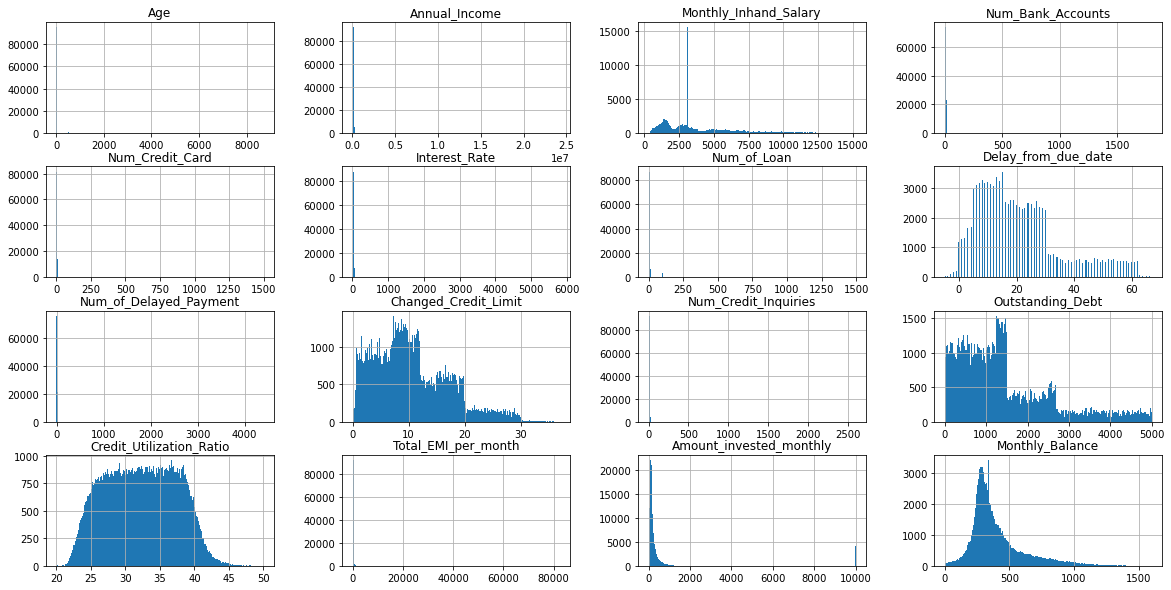

In [26]:
df.hist(bins=200,figsize=[20,10])

Create pie charts to see the ratios of every nomial variables.

In [27]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

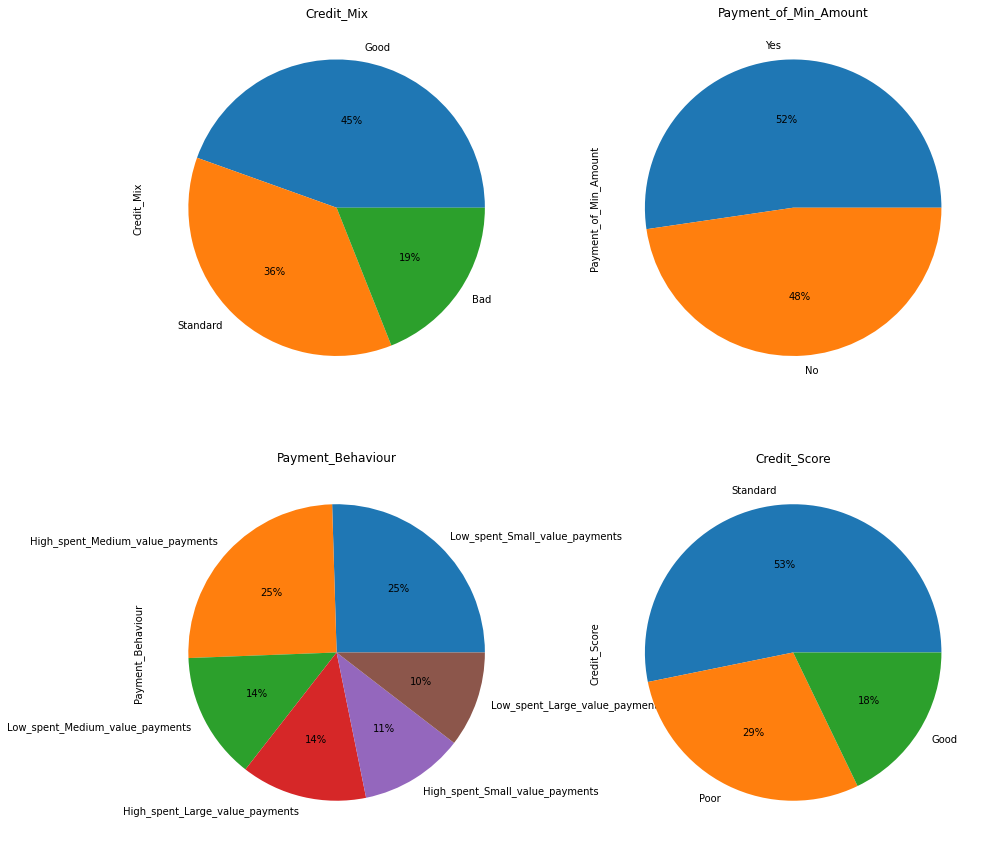

In [28]:
pie_plot(df, ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'], 2,2)

In [29]:
numeric_cols = df.select_dtypes(exclude = "object").columns
cat_cols = df.select_dtypes(include = "object").columns
print(numeric_cols)
print(cat_cols)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')
Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


<AxesSubplot:xlabel='Occupation', ylabel='count'>

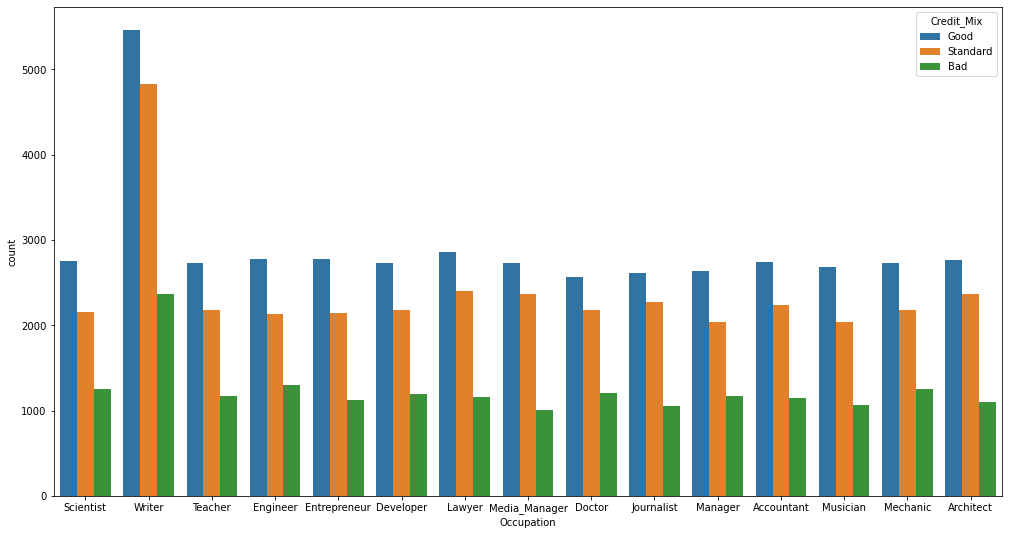

In [31]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Credit_Mix")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

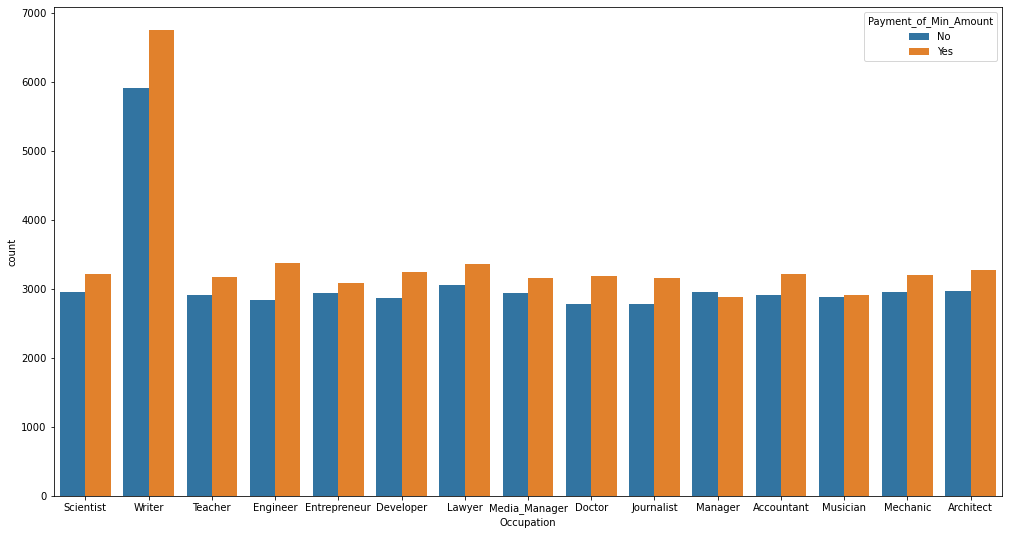

In [32]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Payment_of_Min_Amount")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

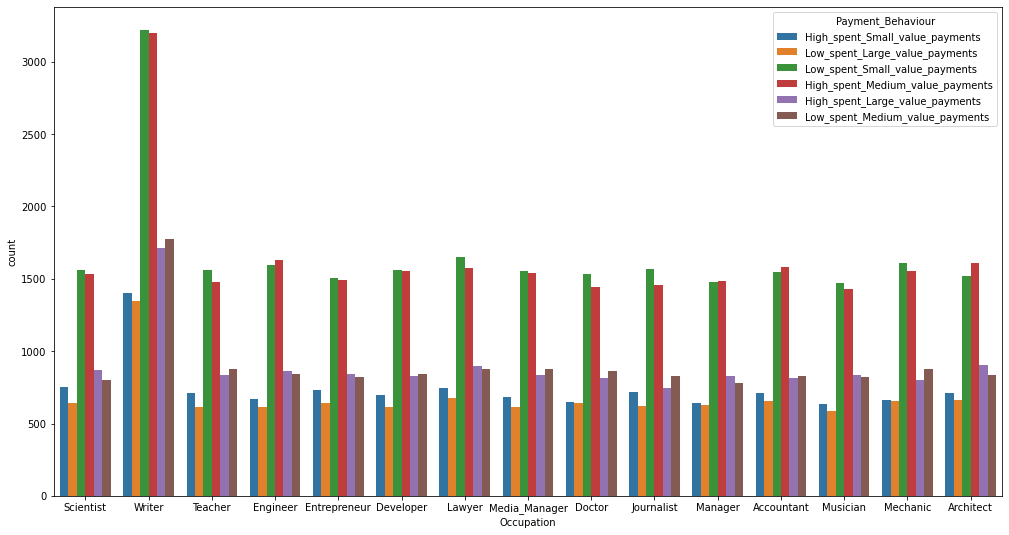

In [33]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Payment_Behaviour")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

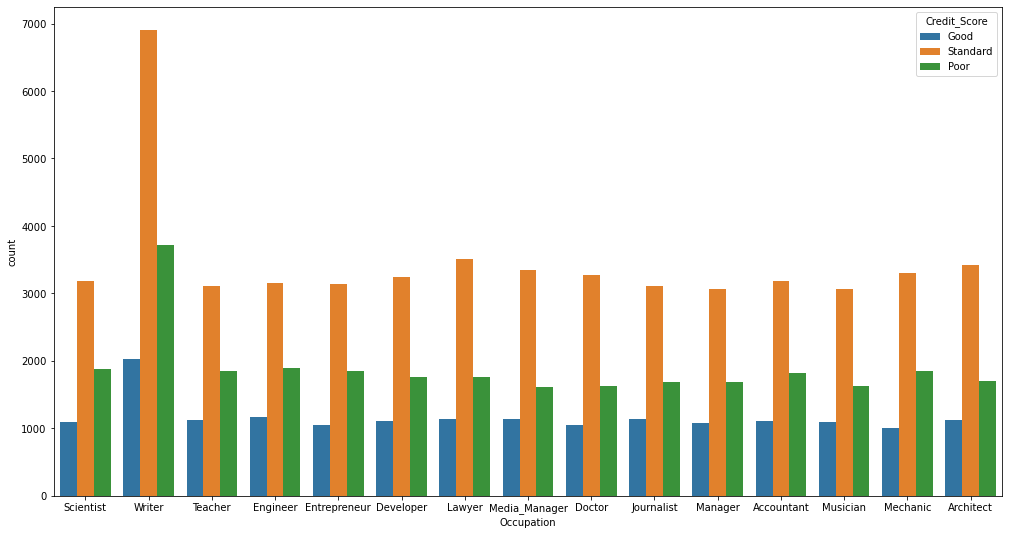

In [34]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Credit_Score")

# Checking multicollinearity with VIF

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity.

In [36]:
vif_df = df[numeric_cols]

vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(17)

,feature,VIF
0,Age,1.030047
1,Annual_Income,1.016152
2,Monthly_Inhand_Salary,4.751792
3,Num_Bank_Accounts,1.021315
4,Num_Credit_Card,1.029829
5,Interest_Rate,1.023865
6,Num_of_Loan,1.030466
7,Delay_from_due_date,4.436032
8,Num_of_Delayed_Payment,1.018732
9,Changed_Credit_Limit,4.290441


<AxesSubplot:>

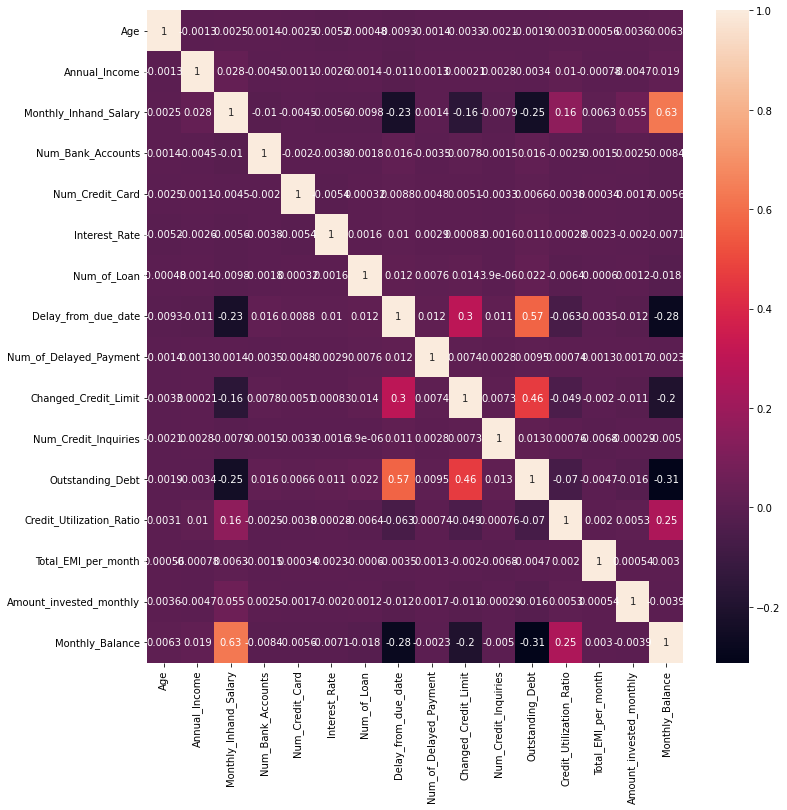

In [38]:
plt.figure(figsize= (12,12))
sns.heatmap(df[numeric_cols].corr(),annot=True)

# Dealing with outliers

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations. Two activities are essential for characterizing a set of data:

Examination of the overall shape of the graphed data for important features, including symmetry and departures from assumptions.
Examination of the data for unusual observations that are far removed from the mass of data. These points are often referred to as outliers. Two graphical techniques for identifying outliers, scatter plots and box plots, along with an analytic procedure for detecting outliers when the distribution is normal (Grubbs' Test)

In [39]:
def box_plot(df, num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sns.boxplot(df[l], palette="flare")

c:\Users\wsy\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\wsy\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\wsy\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\wsy\anaconda3\lib\site-packages

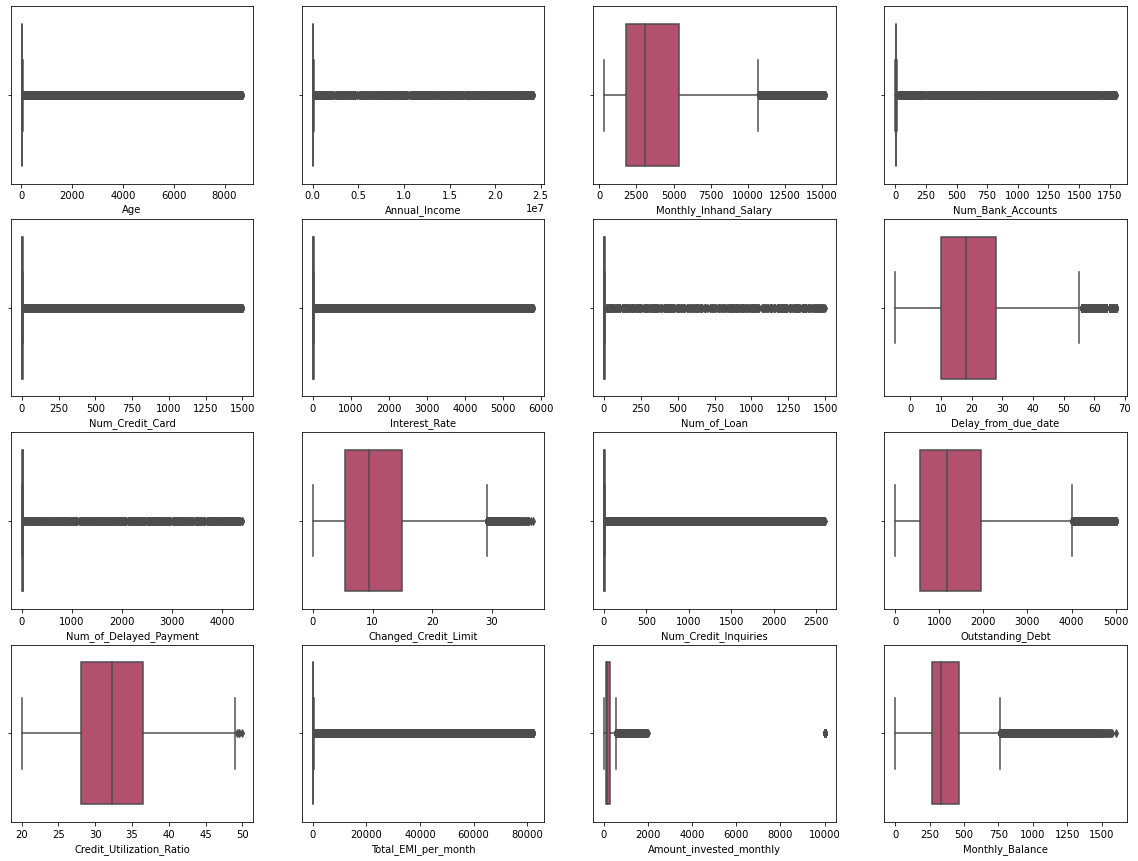

In [40]:
box_plot(df, numeric_cols)

IQR (Inter Quartile Range)

IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

IQR = Quartile3 – Quartile1

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [41]:
df_n = df.copy()
for i in numeric_cols:
    ''' Detection '''
    # IQR
    Q1 = np.percentile(df_n[i], 0.05,interpolation = 'midpoint')
    Q3 = np.percentile(df_n[i], 99.95,interpolation = 'midpoint')
    print("@ Feature " + i + "...")
    print("Old Shape: ", df_n.shape)
    df_n[numeric_cols] = df_n[numeric_cols][(df_n[i] < Q3) & (df_n[i] > Q1)]
    df_n.dropna(inplace=True)
    print("New Shape: ", df_n.shape)

@ Feature Age...
Old Shape:  (97799, 21)
New Shape:  (96598, 21)
@ Feature Annual_Income...
Old Shape:  (96598, 21)
New Shape:  (96500, 21)
@ Feature Monthly_Inhand_Salary...
Old Shape:  (96500, 21)
New Shape:  (96402, 21)
@ Feature Num_Bank_Accounts...
Old Shape:  (96402, 21)
New Shape:  (92102, 21)
@ Feature Num_Credit_Card...
Old Shape:  (92102, 21)
New Shape:  (90260, 21)
@ Feature Interest_Rate...
Old Shape:  (90260, 21)
New Shape:  (88056, 21)
@ Feature Num_of_Loan...
Old Shape:  (88056, 21)
New Shape:  (79171, 21)
@ Feature Delay_from_due_date...
Old Shape:  (79171, 21)
New Shape:  (79076, 21)
@ Feature Num_of_Delayed_Payment...
Old Shape:  (79076, 21)
New Shape:  (78994, 21)
@ Feature Changed_Credit_Limit...
Old Shape:  (78994, 21)
New Shape:  (78909, 21)
@ Feature Num_Credit_Inquiries...
Old Shape:  (78909, 21)
New Shape:  (74152, 21)
@ Feature Outstanding_Debt...
Old Shape:  (74152, 21)
New Shape:  (74068, 21)
@ Feature Credit_Utilization_Ratio...
Old Shape:  (74068, 21)
New 

In [42]:
df_n.drop(df_n[df_n["Age"] >= 80].index, inplace=True)
df_n.drop(df_n[df_n["Annual_Income"] >= 500000].index, inplace=True)
df_n.drop(df_n[df_n["Num_Bank_Accounts"] >= 20].index, inplace=True)
df_n.drop(df_n[df_n["Num_Credit_Card"] >= 50].index, inplace=True)
df_n.drop(df_n[df_n["Num_of_Loan"] >= 20].index, inplace=True)
df_n.drop(df_n[df_n["Interest_Rate"] >= 35].index, inplace=True)
df_n.drop(df_n[df_n["Num_of_Delayed_Payment"] >= 30].index, inplace=True)
df_n.drop(df_n[df_n["Num_Credit_Inquiries"] >= 100].index, inplace=True)
df_n.drop(df_n[df_n["Total_EMI_per_month"] >= 2000].index, inplace=True)
df_n.drop(df_n[df_n["Amount_invested_monthly"] >= 1000].index, inplace=True)

c:\Users\wsy\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\wsy\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\wsy\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\wsy\anaconda3\lib\site-packages

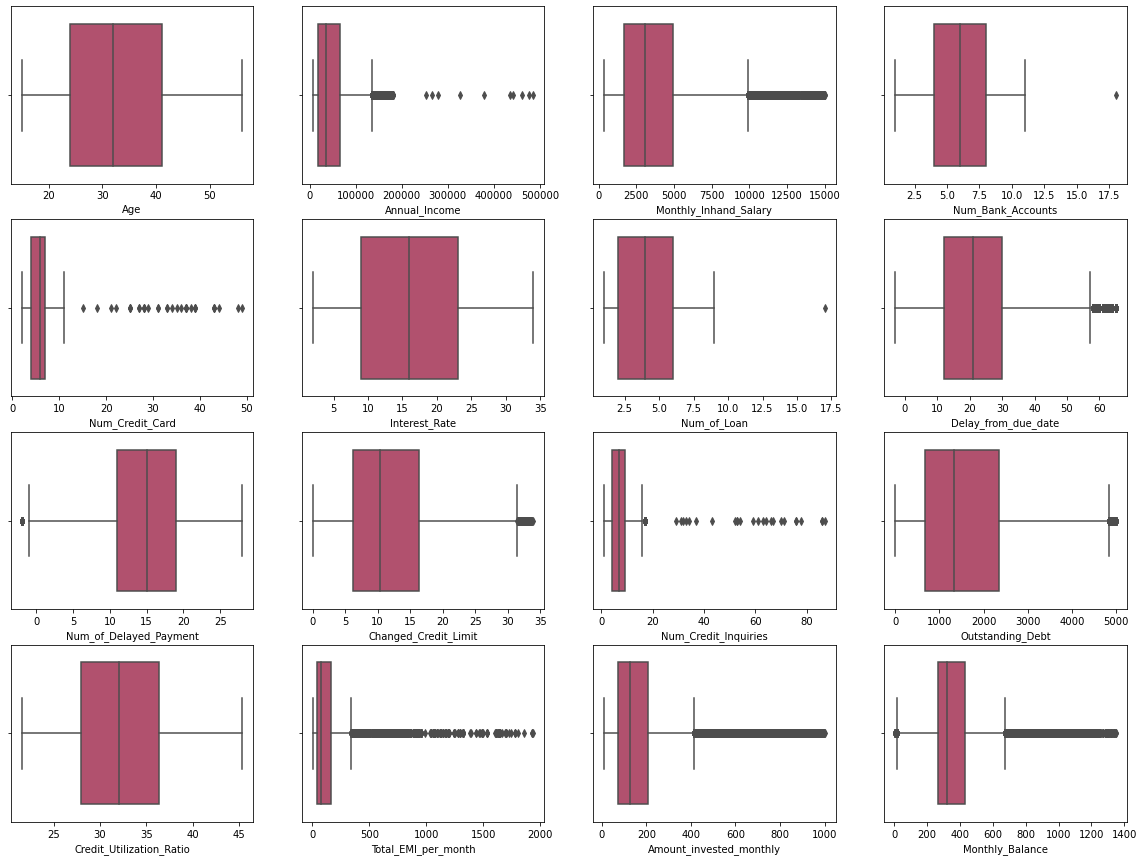

In [44]:
box_plot(df_n, numeric_cols)

# Handling numirical data

StandardScaler
follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

MinMaxScaler
scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005]. In the presence of outliers, StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values. By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset.

In [45]:
df_num_clean = df_n[numeric_cols].copy()

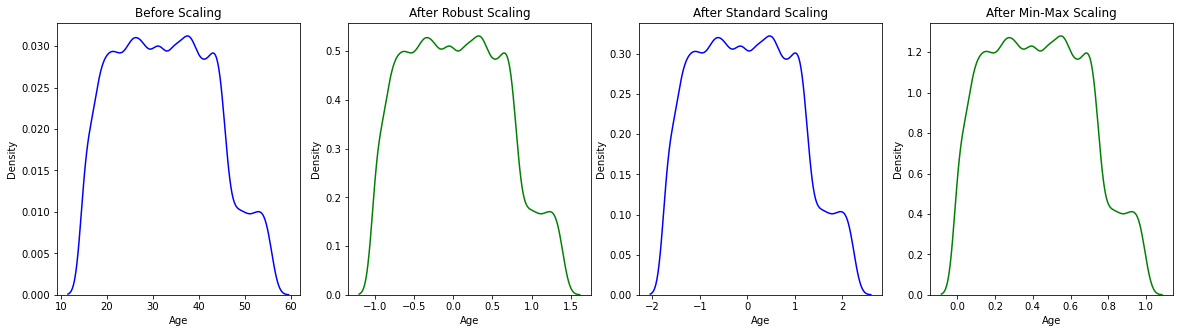

In [47]:
cols = numeric_cols
scaler = preprocessing.RobustScaler()
robust_df_ = scaler.fit_transform(df_num_clean)
robust_df_ = pd.DataFrame(robust_df_, columns =cols)

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df_num_clean)
standard_df = pd.DataFrame(standard_df, columns =cols)
  
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df_num_clean)
minmax_df = pd.DataFrame(minmax_df, columns =cols)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
  
sns.kdeplot(df_num_clean['Age'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
  
sns.kdeplot(robust_df_['Age'], ax = ax2, color ='g')
ax3.set_title('After Standard Scaling')
  
sns.kdeplot(standard_df['Age'], ax = ax3, color ='b')
ax4.set_title('After Min-Max Scaling')
  
sns.kdeplot(minmax_df['Age'], ax = ax4, color ='g')
plt.show()

In [48]:
def RobustScaling(df_num, cols):
    scaler = preprocessing.RobustScaler()
    robust_df_temp = scaler.fit_transform(df_num)
    robust_df_temp = pd.DataFrame(robust_df_temp, columns =cols)
    return robust_df_temp

In [49]:
robust_scaled = RobustScaling(df_num_clean, numeric_cols)

In [50]:
robust_scaled.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-1.000000,-1.000,0.096135,-0.6,-0.312965,-0.625118,-0.223513,-0.338718,-0.047445
1,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-1.222222,-0.125,0.096135,-0.6,-0.312965,-0.017187,-0.223513,-0.063568,-0.217173
2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.888889,-1.375,-0.399405,-0.6,-0.312965,-0.084491,-0.223513,0.526322,-0.589813
3,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-0.833333,-0.125,0.096135,-0.6,-0.312965,-0.865483,-0.223513,-0.622082,0.129167
4,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.722222,-1.375,-0.102081,-0.6,-0.312965,-0.572941,-0.223513,-0.469410,0.123015


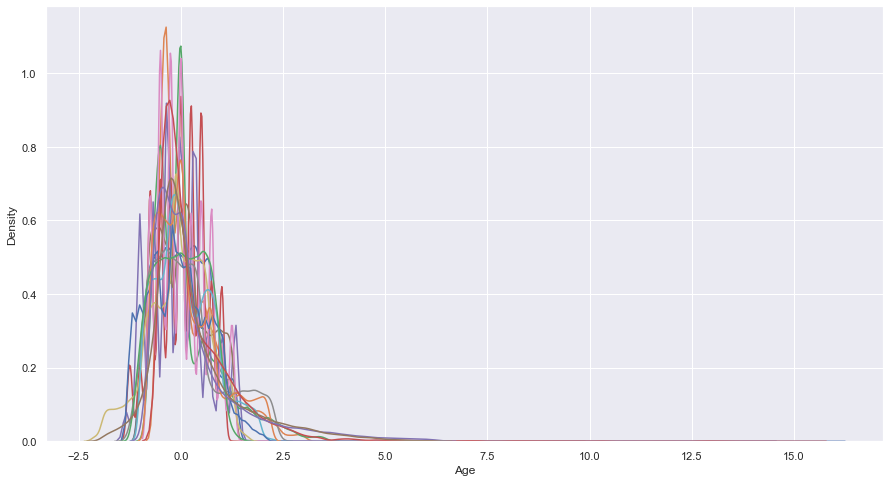

In [51]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in numeric_cols:
    sns.kdeplot(robust_scaled[i], legend=True)

In [52]:
clean_df = df.copy()
clean_df.drop(labels=numeric_cols, axis="columns", inplace=True)
clean_df[numeric_cols] = robust_scaled[numeric_cols]

In [53]:
clean_df.head()

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,Scientist,Good,No,High_spent_Small_value_payments,Good,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-1.000000,-1.000,0.096135,-0.6,-0.312965,-0.625118,-0.223513,-0.338718,-0.047445
1,Scientist,Good,No,Low_spent_Large_value_payments,Good,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-1.222222,-0.125,0.096135,-0.6,-0.312965,-0.017187,-0.223513,-0.063568,-0.217173
3,Scientist,Good,No,Low_spent_Small_value_payments,Good,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-0.833333,-0.125,0.096135,-0.6,-0.312965,-0.865483,-0.223513,-0.622082,0.129167
4,Scientist,Good,No,High_spent_Medium_value_payments,Good,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.722222,-1.375,-0.102081,-0.6,-0.312965,-0.572941,-0.223513,-0.469410,0.123015
5,Scientist,Good,No,High_spent_Medium_value_payments,Good,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-1.000000,-0.875,0.096135,-0.6,-0.312965,-1.133676,-0.223513,0.372894,-0.461205


# Categorical data encoding

Label Encoding
is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

Label Encoding challenges
there is a very high probability that the model captures the relationship between values like they were ordinal which isn't suitble for example for ocean proximity here.

One-Hot Encoding
One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

In [54]:
clean_df['Credit_Score'].replace({"Poor":0, "Standard":1, "Good":2}, inplace=True)
clean_df['Credit_Mix'].replace({"Bad":0, "Standard":1, "Good":2}, inplace=True)
clean_df['Payment_of_Min_Amount'].replace({"Yes":1, "No":0}, inplace=True)
clean_df = pd.get_dummies(clean_df, columns = ['Occupation', 'Payment_Behaviour'])

In [55]:
for i in numeric_cols:
    clean_df[i].fillna(method='ffill', inplace=True)

In [56]:
clean_df.head()

,Credit_Mix,Payment_of_Min_Amount,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-1.000000,-1.000,0.096135,-0.6,-0.312965,-0.625118,-0.223513,-0.338718,-0.047445,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2,0,2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-1.222222,-0.125,0.096135,-0.6,-0.312965,-0.017187,-0.223513,-0.063568,-0.217173,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-0.833333,-0.125,0.096135,-0.6,-0.312965,-0.865483,-0.223513,-0.622082,0.129167,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,2,0,2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.722222,-1.375,-0.102081,-0.6,-0.312965,-0.572941,-0.223513,-0.469410,0.123015,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-1.000000,-0.875,0.096135,-0.6,-0.312965,-1.133676,-0.223513,0.372894,-0.461205,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


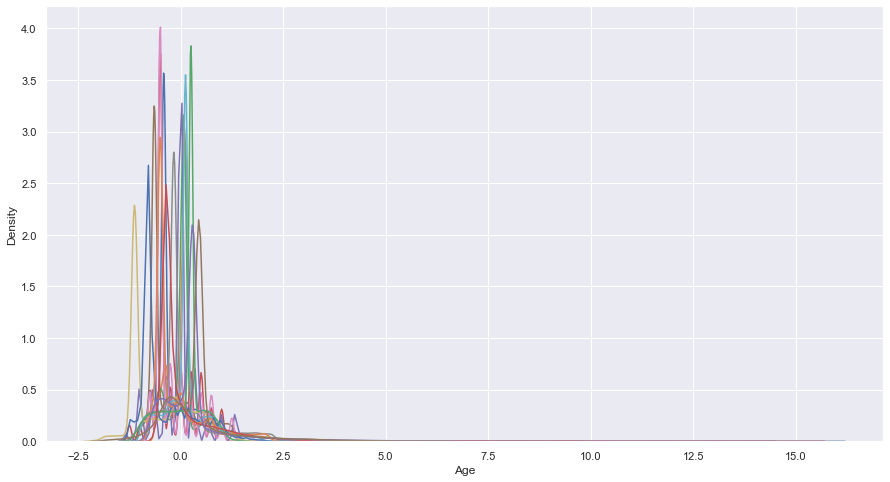

In [57]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in numeric_cols:
    sns.kdeplot(clean_df[i], legend=True)